In [75]:
from keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Lambda, Flatten, Reshape, MaxPooling2D
from keras.models import Model
from keras.losses import mean_squared_error, binary_crossentropy, kullback_leibler_divergence
from keras.callbacks import EarlyStopping, TerminateOnNaN, ReduceLROnPlateau
from keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, scipy
from sklearn.model_selection import train_test_split

from phenom_read_in_data import *

In [76]:
#Getthe data
df = csv_to_df('ttbarZ/')

In [77]:
df

,event_ID,process_ID,event_weight,MET,MET_Phi,obj1,E1,pt1,eta1,phi1,...,obj12,E12,pt12,eta12,phi12,obj13,E13,pt13,eta13,phi13
0,21,ttbarZ,1,43924.6,-0.38825,j,165476,165097,-0.0171131,-1.54448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,ttbarZ,1,45289,-3.09984,j,105746,95333.9,0.449145,1.79273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,ttbarZ,1,16530.4,-3.09183,b,144211,137971,0.100321,-0.0772316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,ttbarZ,1,18362.9,1.14058,b,370358,120835,1.78374,-0.757091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,ttbarZ,1,232797,-2.74669,j,436613,432317,-0.110325,0.656242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,21,ttbarZ,1,17569.3,3.08905,j,223425,161759,-0.840404,2.52008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5870,21,ttbarZ,1,70402.4,-1.12592,b,340938,86263.4,-2.05015,-0.018614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5871,21,ttbarZ,1,28553.9,0.862966,j,116154,114311,0.0884322,-2.74727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,21,ttbarZ,1,183633,1.98713,j,350312,178245,1.29249,0.477881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#If the number of max objects is prime, another column needs to be added to mitigate 

In [79]:
df['obj14']= -999
df['E14'] = -999
df['pt14'] = -999
df['eta14'] = -999
df['phi14'] = -999

In [80]:
df = df.fillna(-999)
variables = [entry for entry in df.columns if entry[0] == 'E'] + [entry for entry in df.columns if entry[0:2] == 'pt'] + [entry for entry in df.columns if entry[0:2] == 'et'] + [entry for entry in df.columns if entry[0:2] == 'ph']

In [81]:
objects = []
for i in df.columns:
    if i[:3] == 'obj':
        objects.append(i)

In [82]:
j_objects1 = df.loc[df['obj1'] == 'j', df.columns[6:10]]

In [83]:
j_objects1

,E1,pt1,eta1,phi1
0,165476,165097,-0.0171131,-1.54448
1,105746,95333.9,0.449145,1.79273
4,436613,432317,-0.110325,0.656242
5,265871,210909,-0.671705,-2.92575
6,296867,102488,-1.72479,1.81765
...,...,...,...,...
5868,227671,149490,-0.959438,-2.704
5869,223425,161759,-0.840404,2.52008
5871,116154,114311,0.0884322,-2.74727
5872,350312,178245,1.29249,0.477881


In [84]:
j_objects2 = df.loc[df['obj2'] == 'j', df.columns[11:15]]

In [85]:
j_objects2 = df.loc[df['obj2'] == 'j', df.columns[11:15]]
j_objects3 = df.loc[df['obj3'] == 'j', df.columns[16:20]]
j_objects4 = df.loc[df['obj4'] == 'j', df.columns[21:25]]
j_objects5 = df.loc[df['obj5'] == 'j', df.columns[26:30]]
j_objects6 = df.loc[df['obj6'] == 'j', df.columns[31:35]]
j_objects7 = df.loc[df['obj7'] == 'j', df.columns[36:40]]
j_objects8 = df.loc[df['obj8'] == 'j', df.columns[41:45]]
j_objects9 = df.loc[df['obj9'] == 'j', df.columns[46:50]]
j_objects10 = df.loc[df['obj10'] == 'j', df.columns[51:55]]
j_objects11 = df.loc[df['obj11'] == 'j', df.columns[56:60]]
j_objects12 = df.loc[df['obj12'] == 'j', df.columns[61:65]]
j_objects13 = df.loc[df['obj13'] == 'j', df.columns[66:70]]
j_objects14 = df.loc[df['obj14'] == 'j', df.columns[71:75]]

/home/joe/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [86]:
j_objs = [j_objects1, j_objects2, j_objects3, j_objects4, j_objects5, j_objects6, j_objects7, j_objects8, 
         j_objects9, j_objects10, j_objects11, j_objects12, j_objects13, j_objects14]

In [87]:
data = pd.concat(j_objs, sort=False)

In [88]:
data

,E1,pt1,eta1,phi1,E2,pt2,eta2,phi2,E3,pt3,...,eta12,phi12,E13,pt13,eta13,phi13,E14,pt14,eta14,phi14
0,165476,165097,-0.0171131,-1.54448,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105746,95333.9,0.449145,1.79273,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,436613,432317,-0.110325,0.656242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,265871,210909,-0.671705,-2.92575,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,296867,102488,-1.72479,1.81765,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.559472,1.26894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0393824,-1.53926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0629869,2.72413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42197.8,25092.7,-1.10318,0.640652,NaN,NaN,NaN,NaN


In [89]:
data = data.fillna(-999)

In [90]:
data['process_ID'] = 'ttbarZ'

In [91]:
data

,E1,pt1,eta1,phi1,E2,pt2,eta2,phi2,E3,pt3,...,phi12,E13,pt13,eta13,phi13,E14,pt14,eta14,phi14,process_ID
0,165476,165097,-0.0171131,-1.54448,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
1,105746,95333.9,0.449145,1.79273,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
4,436613,432317,-0.110325,0.656242,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
5,265871,210909,-0.671705,-2.92575,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
6,296867,102488,-1.72479,1.81765,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,1.26894,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
5436,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-1.53926,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
5713,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,2.72413,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
263,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,42197.8,25092.7,-1.10318,0.640652,-999.0,-999.0,-999.0,-999.0,ttbarZ


In [92]:
one_hot = pd.get_dummies(data['process_ID'])
processes = one_hot.columns
data.drop('process_ID', axis = 'columns', inplace = True)
data = pd.concat([data, one_hot], sort = False, axis = 1)

In [93]:
data

,E1,pt1,eta1,phi1,E2,pt2,eta2,phi2,E3,pt3,...,phi12,E13,pt13,eta13,phi13,E14,pt14,eta14,phi14,ttbarZ
0,165476,165097,-0.0171131,-1.54448,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
1,105746,95333.9,0.449145,1.79273,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
4,436613,432317,-0.110325,0.656242,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
5,265871,210909,-0.671705,-2.92575,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
6,296867,102488,-1.72479,1.81765,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,1.26894,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
5436,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-1.53926,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
5713,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,2.72413,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
263,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,42197.8,25092.7,-1.10318,0.640652,-999.0,-999.0,-999.0,-999.0,1


In [94]:
variables = [entry for entry in df.columns if entry[0] == 'E'] + [entry for entry in df.columns if entry[0:2] == 'pt'] + [entry for entry in df.columns if entry[0:2] == 'et'] + [entry for entry in df.columns if entry[0:2] == 'ph']

In [95]:
#We have created a df of our values and some kind of class label
#We should normalize
x = data[variables].values
x_scaled = StandardScaler().fit_transform(x)
data[variables] = x_scaled

x_train, x_test, y_train, y_test = train_test_split(data[variables].values,
						    data[processes].values, 
                                                    shuffle = True,
                                                    random_state = 42,
                                                    test_size = 0.1)

In [96]:
#Reshape the data. This will have to be done explicitly until you think of a clever way of doing it
x_train = x_train.reshape((x_train.shape[0], 4, 2, 7))
x_test = x_test.reshape((x_test.shape[0], 4, 2, 7))

In [98]:
def sampling(args):
    z_mean, z_log_var=args
    epsilon=tf.random.uniform(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean+K.exp(z_log_var/2)*epsilon

In [99]:
#VAE Model
original_dim = x_train.shape[0]
input_shape = x_train.shape[1:]
latent_dim = 4
intermediate_dim = 50
kernel_max_norm = 1000.
act_fun = 'relu'
epsilon_std = 1.
filters = 32
kernel_size = (3, 3)
strides = (1, 1)


In [112]:
#Layers
x_input = Input(shape = input_shape, name = 'Input')
conv_1 = Conv2D(filters = filters, 
                activation = act_fun,
                kernel_size = kernel_size,
                strides = strides, 
                padding = 'same')(x_input)
pool_1 = MaxPooling2D(pool_size = (1, 1),
                      strides = 2,
                      #data_format = 'channels_first'
                     )(conv_1)
conv_2 = Conv2D(filters = filters, 
                activation = act_fun, 
                kernel_size = kernel_size, 
                strides = strides, 
                padding = 'same')(pool_1)

#Shape info needed to inform the dense layer in the decoder
flatten = Flatten()(conv_2)
#cnn = Model(x_input, flatten, name = 'cnn')
#cnn.summary()

shape = input_shape

In [113]:
#Encoding
dense_encoder_1 = Dense(intermediate_dim,
                        activation = act_fun,
                        name = 'dense_encoder_1')(flatten)
dense_encoder_2 = Dense(16,
                        activation = act_fun,
                        name = 'dense_encoder_2')(dense_encoder_1)
z_mean = Dense(latent_dim, name = 'z_mean')(dense_encoder_2)
z_var = Dense(latent_dim, name = 'z_var')(dense_encoder_2)

z = Lambda(sampling, output_shape = (latent_dim, ), name = 'sampling')([z_mean, z_var])

encoder = Model(x_input, [z_mean, z_var, z], name = 'encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 4, 2, 7)      0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 4, 2, 32)     2048        Input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 2, 1, 32)     0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 2, 1, 32)     9248        max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [114]:
#Decoding
decoder_input = Input(shape = (latent_dim, ), name = 'decoder_input')
dense_decoder_1 = Dense(shape[0]*shape[1]*shape[2], 
                        activation = act_fun, name = 'dense_decoder_1')(decoder_input)
reshape = Reshape((shape[0], shape[1], shape[2]))(dense_decoder_1)

deconv_1 = Conv2DTranspose(filters = filters,
                           kernel_size = kernel_size, 
                           activation = act_fun, 
                           strides = strides, 
                           padding = 'same', 
                           name = 'deconv_1')(reshape)
deconv_2 = Conv2DTranspose(filters = 16,
                           kernel_size = kernel_size, 
                           activation = act_fun, 
                           strides = strides, 
                           padding = 'same', 
                           name = 'deconv_2')(deconv_1)

output = Conv2DTranspose(filters = 7, 
                         kernel_size = kernel_size, 
                         activation = 'sigmoid', 
                         padding = 'same', 
                         strides = strides, 
                         name = 'decoder_output')(deconv_2)

decoder = Model(decoder_input, output, name = 'decoder')
decoder.summary()


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 4)                 0         
_________________________________________________________________
dense_decoder_1 (Dense)      (None, 56)                280       
_________________________________________________________________
reshape_3 (Reshape)          (None, 4, 2, 7)           0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 4, 2, 32)          2048      
_________________________________________________________________
deconv_2 (Conv2DTranspose)   (None, 4, 2, 16)          4624      
_________________________________________________________________
decoder_output (Conv2DTransp (None, 4, 2, 7)           1015      
Total params: 7,967
Trainable params: 7,967
Non-trainable params: 0
_________________________________________________________

In [115]:
#Build the VAE model
outputs = decoder(encoder(x_input)[2])
vae = Model(x_input, outputs, name = 'vae')

In [116]:
#Define some losses
def kl_loss(y_true, y_pred):
    kl_loss = 1 + z_var - K.square(z_mean) - K.exp(z_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    #kl_loss = K.mean(kl_loss)
    return kl_loss

def recon_loss(y_true, y_pred):
    recon_loss = mean_squared_error(K.flatten(y_true), K.flatten(y_pred))
    recon_loss *= shape[0]*shape[1]*shape[2]
    #recon_loss = K.mean(recon_loss)
    return recon_loss

def my_vae_loss(y_true, y_pred):
    recon = recon_loss(y_true, y_pred) 
    kl = kl_loss(y_true, y_pred)
    vae_loss = recon + kl
    return vae_loss


In [117]:
vae.compile(optimizer = 'rmsprop', loss = my_vae_loss, metrics = [kl_loss, recon_loss])
vae.summary()


Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 4, 2, 7)           0         
_________________________________________________________________
encoder (Model)              [(None, 4), (None, 4), (N 15498     
_________________________________________________________________
decoder (Model)              (None, 4, 2, 7)           7967      
Total params: 23,465
Trainable params: 23,465
Non-trainable params: 0
_________________________________________________________________


In [118]:
#Fit the model
epochs = 100
batch_size = 100

history = vae.fit(x = x_train,
                  y = x_train,
                  validation_data = (x_train, x_train),
                  epochs = epochs,
                  batch_size = batch_size,
                  verbose = 2)

vae.save('cnn-vae_model.h5')

Train on 22999 samples, validate on 22999 samples
Epoch 1/100
 - 1s - loss: 51.9614 - kl_loss: 0.2475 - recon_loss: 51.7134 - val_loss: 49.1760 - val_kl_loss: 0.3952 - val_recon_loss: 48.7800
Epoch 2/100
 - 1s - loss: 48.3187 - kl_loss: 0.3636 - recon_loss: 47.9545 - val_loss: 47.7833 - val_kl_loss: 0.3083 - val_recon_loss: 47.4741
Epoch 3/100
 - 1s - loss: 47.7086 - kl_loss: 0.2970 - recon_loss: 47.4112 - val_loss: 47.5253 - val_kl_loss: 0.2633 - val_recon_loss: 47.2612
Epoch 4/100
 - 1s - loss: 47.5771 - kl_loss: 0.2568 - recon_loss: 47.3198 - val_loss: 47.4630 - val_kl_loss: 0.2507 - val_recon_loss: 47.2115
Epoch 5/100
 - 1s - loss: 47.4678 - kl_loss: 0.2407 - recon_loss: 47.2273 - val_loss: 47.3516 - val_kl_loss: 0.2147 - val_recon_loss: 47.1361
Epoch 6/100
 - 1s - loss: 47.2924 - kl_loss: 0.2464 - recon_loss: 47.0556 - val_loss: 47.1616 - val_kl_loss: 0.2274 - val_recon_loss: 46.9334
Epoch 7/100
 - 1s - loss: 47.2089 - kl_loss: 0.2365 - recon_loss: 46.9718 - val_loss: 47.1176 - va

 - 1s - loss: 47.0004 - kl_loss: 0.2214 - recon_loss: 46.7780 - val_loss: 46.8699 - val_kl_loss: 0.2455 - val_recon_loss: 46.6235
Epoch 59/100
 - 1s - loss: 46.9868 - kl_loss: 0.2296 - recon_loss: 46.7564 - val_loss: 46.9705 - val_kl_loss: 0.2122 - val_recon_loss: 46.7575
Epoch 60/100
 - 1s - loss: 46.9689 - kl_loss: 0.2136 - recon_loss: 46.7550 - val_loss: 46.8801 - val_kl_loss: 0.2338 - val_recon_loss: 46.6454
Epoch 61/100
 - 1s - loss: 46.9678 - kl_loss: 0.2112 - recon_loss: 46.7560 - val_loss: 47.2265 - val_kl_loss: 0.2471 - val_recon_loss: 46.9786
Epoch 62/100
 - 1s - loss: 47.0218 - kl_loss: 0.2156 - recon_loss: 46.8071 - val_loss: 46.9715 - val_kl_loss: 0.2585 - val_recon_loss: 46.7122
Epoch 63/100
 - 1s - loss: 46.9701 - kl_loss: 0.2423 - recon_loss: 46.7282 - val_loss: 47.1122 - val_kl_loss: 0.1893 - val_recon_loss: 46.9220
Epoch 64/100
 - 1s - loss: 46.9388 - kl_loss: 0.2282 - recon_loss: 46.7097 - val_loss: 46.8549 - val_kl_loss: 0.2385 - val_recon_loss: 46.6155
Epoch 65/100

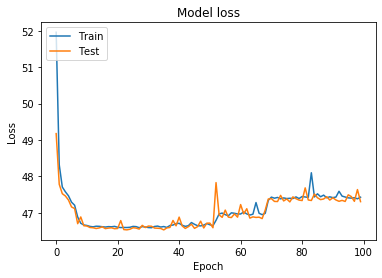

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [120]:
vae.metrics_names

['loss', 'kl_loss', 'recon_loss']

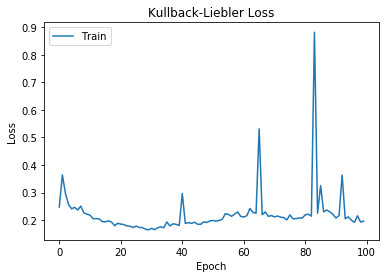

In [121]:
plt.plot(history.history['kl_loss'])
plt.title('Kullback-Liebler Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

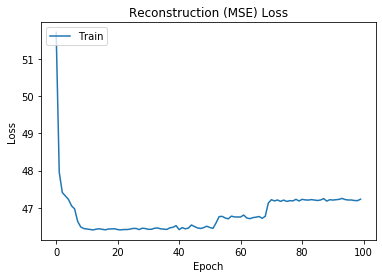

In [122]:
plt.plot(history.history['recon_loss'])
plt.title('Reconstruction (MSE) Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()